In [32]:
import xarray as xr
import datetime
import numpy as np 
import matplotlib.pyplot as plt

In [97]:
start_time = datetime.datetime(2020, 1, 4)
x = np.arange(5000)
t = np.array([start_time+datetime.timedelta(days = int(i)) for i in x])

y = np.sin(2*np.pi*x/400)
y2 = np.sin(2*np.pi*x/400+np.pi/4)*0.5

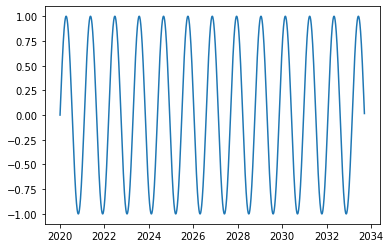

In [98]:
plt.plot(t, y)

In [81]:
ds = xr.Dataset(data_vars={'y': (["time",], y), 'y2': (["time",], y2)}, coords={"time": t})



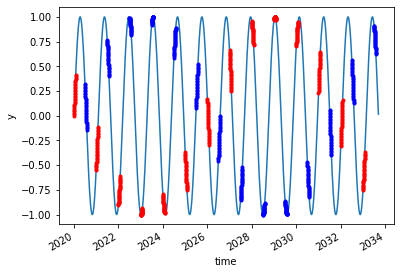

In [75]:
month_idxs=ds.groupby('time.month').groups
jan_idxs = month_idxs[1]
jul_idxs = month_idxs[7]

ds.y.plot()
ds.y[jan_idxs].plot(color='r', marker='.', linestyle="")
ds.y[jul_idxs].plot(color='b', marker='.', linestyle="")

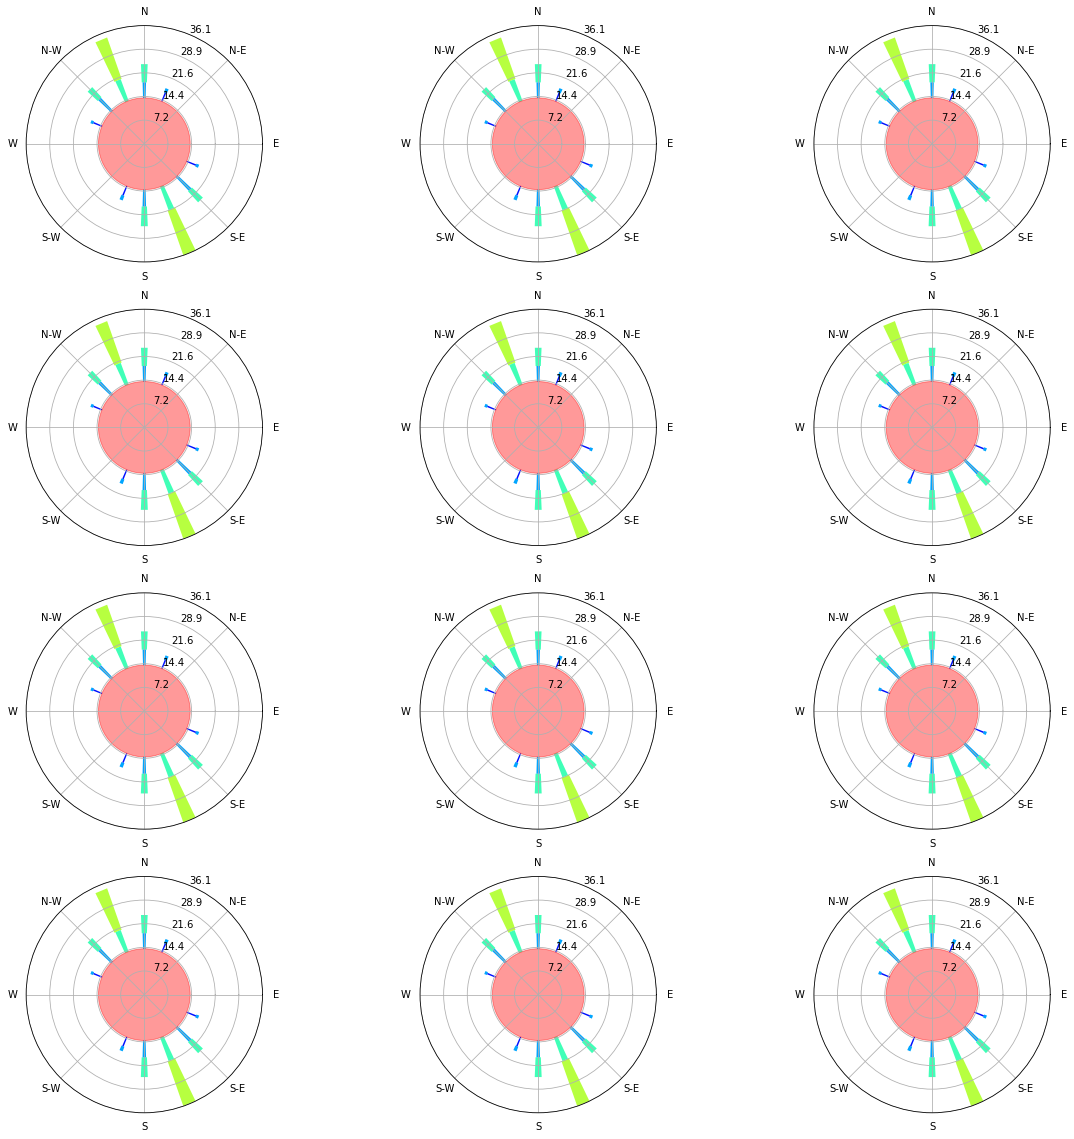

Wall time: 2min 8s


In [141]:
%%time

from windrose import WindroseAxes, WindAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np


fig = plt.figure(figsize=(20,20))

for month in np.arange(1, 13):
    ax = fig.add_subplot(4, 3, month, projection='windrose') # need the zutils.plotting axis layer

    # CALM_CIRCLE_COLOR = "red" AND CALM_CIRCLE_ALPHA = 0.4 appear to be fixed
    ax.box(d*180/np.pi, np.sqrt(y**2+y2**2), bins=np.arange(0, 8, 1)/4, normed=True, calm_limit=0.4)
    
    # Need to add the legend back too
    # ax.set_legend()
    
plt.show()


In [114]:
axz[0,0]

<AxesSubplot:>

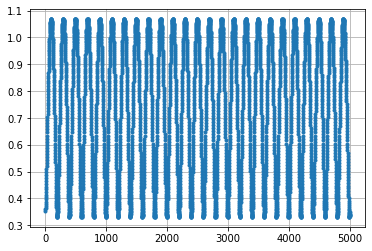

In [101]:
plt.plot(np.sqrt(y**2+y2**2), '.')

plt.grid()

In [118]:
WindroseAxes.from_ax?